## 概述
- $PA=LU$置换与转置 permutations and transpose
- vector spaces and Subspaces 向量空间与子空间 重要！！

-----
## 正文
### 置换
从置换矩阵开始
Permutation $P$:execute row exchanges，功能就是执行行变换。
比如在求解过程中，碰到0出现在主元位置，我们就要进行行变换，将0移走。
上一讲，在求$A=LU$时我们是限定了没有进行行变换，$A$的情况很好，定时实际上这是很少的情况，现在我们放开限定，现在我们的例子在消元的过程中需要进行换变换。

我们来讲下MATLAB是怎么做的，MATLAB不仅会像人一样检验主元的位置是否为0，实质上它也不允许非常小的值，主元接近于0，数值运算上很难处理。所以在我们认为没必要进行行变换的情况，MATLAB也会进行行变换，因为会影响数值准确性。

当然说回来，我们现在讲的是代数，那么怎么处理需要行变换的情况呢，解决方法就是这个公式：$PA=LU$，This is the description fo elimination with row exchanges.所以在考虑行变换的情况下 $A=LU$升级为了$PA=LU$.$P$is the matrix that does the row exchanges. 它将各行换为正确顺序
permutations $P$ is the identity matrix with reorderd rows


$n!=n(n-1)...(3)(2)(1)$ 
counts reorderings.重排列的个数
counts all nxn permutations.n阶置换矩阵的个数
它们都有一个很好的性质，可逆！而且逆与转置矩阵相等 $P^{-1}=P^T$

----
### 转置
举例：$\begin{bmatrix}1&3\\2&3\\4&1\end{bmatrix}$,对它进行转置
转置记做$T$,MATLAB里记做一撇$'$.
结果是:$\begin{bmatrix}1&2&3\\3&3&1\end{bmatrix}$ ,公式表示为

Transpise: $(A^T)_{ij}$=$A_{ji}$

下面讲一个性质很好的矩阵，对称矩阵，表示转置后矩阵没有改变，公式表示为$A^T=A$
举例:
$\begin{bmatrix}3&1&7\\1&2&90\\7&9&4\end{bmatrix}$，这就是一个对称矩阵

所有$R$的转置乘以$R$得到的矩阵是对称的。
$\begin{bmatrix}1&3\\2&3\\4&1\end{bmatrix}$$\begin{bmatrix}1&2&3\\3&3&1\end{bmatrix}$=
$\begin{bmatrix}10&11&7\\11&-&-\\7&-&-\end{bmatrix}$

为什么会这样呢？公式证明;
$(R^TR)^T$=R^TR^{TT}$=$R^TR$，容易理解吧

------
### 向量空间与子空间
在确定向量空间上面，我们需要做的这些。首先向量必须的两种运算：加法与乘法。
(PS:乘法里有句话：We multiply them by numbers,usually called scalers.记住scalers在算法中的意思。)
如果我们想正确的探讨向量空间，我们需要能够运用加法与乘法，并且满足某些规则。

Vector Spaces
我们先说一下这个Space是什么意思:这里表示大量的向量，a bunch of vector,a space of vector.但是并不是任意的向量组合都能称之为空间。
空间必须满足一定的规则，能够进行加法与乘法，能够进行线性组合！！
我们还是举例：
$R^2$=all 2-dim real vectors，=x-y plane 它表示一个二维实向量(向量的值都是实数)空间，举几个实数2维向量：
$\begin{bmatrix}3&2\end{bmatrix}$，$\begin{bmatrix}0&0\end{bmatrix}$，$\begin{bmatrix}π&e\end{bmatrix}$.
我们画个图

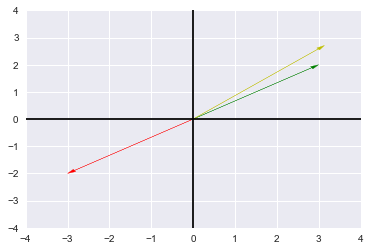

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from functools import partial

fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
#获取当前的axes instand
ax = plt.gca()

#设置x,y轴的显示范围
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

#得到箭头向量，这一步还需看接口定义
arrow_vector = partial(plt.arrow, width=0.001, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 3, 2, color='g')
arrow_vector(0, 0, -3, -2, color='r')
arrow_vector(0, 0, 3.14, 2.71, color='y')

plt.draw()

$R^2$是一个简单的向量空间，就是一个二维平面。这里要重点说下0向量，在这里也就是远点，0向量是一个空间必须有的向量。因为空间必须满足空间内部向量相乘后得到的向量还在空间内。那么也就是说向量$\begin{bmatrix}3&2\end{bmatrix}$乘以任何scaler，包括0后得到的向量还要属于这个空间内，所以必须要有这个原点零向量。

-----
下面来看下$R^3$=all vectors with 3 components,说明下向量$\begin{bmatrix}3&2&0\end{bmatrix}$，是属于$R^3$
那$R^n$= all column vector with n components

我们能否在完成运后还在空间中。
我们现在看不能的例子。

我们取$R^2$的第一象限，假如我用负数乘以里面的向量，它就不在第一象限了，所以它不构成一个向量空间，因为他对于实数的数乘不是封闭的。
*向量空间必须对数乘和加法两种运算是封闭的或者说对线性代数是封闭的!*

这里就是说到子向量了，对于$R^n$我们更关心的是它inside space，既满足空间规则，又无需包含所有向量。
对于$R^2$,我们取个例子，找出一个向量子空间。
先假设该向量在子空间中，如下如所示：

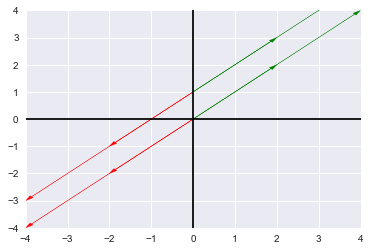

In [11]:
fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')

#获取当前的axes instand
ax = plt.gca()

#设置x,y轴的显示范围
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

#得到箭头向量，这一步还需看接口定义
arrow_vector = partial(plt.arrow, width=0.001, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 2, 2, color='g')
arrow_vector(0, 0, -2, -2, color='r')
arrow_vector(0, 0, 4, 4, color='g')
arrow_vector(0, 0, -4, -4, color='r')

arrow_vector(0, 1, 2, 2, color='g')
arrow_vector(0, 1, -2, -2, color='r')
arrow_vector(0, 1, 4, 4, color='g')
arrow_vector(0, 1, -4, -4, color='r')

plt.draw()

穿过原点的这条直线上的向量满足加法与乘法的封闭性，这条直线上的向量，乘以任何数还是在这条直线上，这条直线上的任意向量相加也还在这条直线上，所以这条直线就是$R^2$的子空间的一个例子。但是不是所有直线都是子空间，例如上图未穿过原点的直线，就不满足乘法与加法的封闭性。

列出$R^2$的所有子空间：
- $R^2$本身 
- 穿过原点的直线,通常记做$L$
- 零向量本身 通常记做$Z$

列出$R^3$的所有子空间：
- $R^3$本身 
- 穿过原点的直线
- 穿过原点的平面
- 零向量本身

子空间是如何得到的，看由矩阵构造出子空间：有矩阵$A$=$\begin{bmatrix}1&3\\2&3\\4&1\end{bmatrix}$ columns in $R^3$
这两列的线性组合构成一个子空间。它有个名字：**列空间**，记为$C(A)$ C for column space.
这一讲的核心思想是，**通过某些列向量的线性组合组成列空间**。假如这些向量是$R^3$上的，那么也就构成$R^3$的一个子空间。
